# Tarea 1 Redes Convolucionales

IIC-3697 Aprendizaje Profundo | Abril 2024

Profesor: Álvaro Soto

Ayudante: Brian Murtagh (bmurtagh@uc.cl)


In [33]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchsummary import summary

%matplotlib inline

## Pregunta 1: SimpleCNN (30%)

## Actividad 1: CIFAR-10

In [28]:
transform1 = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values to [-1, 1]
])

In [29]:
"""
TAREA: Como primera tarea deben traer y cargar el dataset de entrenamiento y validación de CIFAR-10 utilizando la librería de torchvision.
Para el dataloader utilice un batch_size de 4.
"""

# Traer datasets

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform1)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform1)

# Crear Dataloaders

batch_train_size = 64
batch_test_size = 1024

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_train_size, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_test_size, shuffle=False, num_workers=4)

# Definir clases

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


**Responder brevemente aquí:**

*   *¿Que hace el parametro _shuffle_ en los DataLoaders de Pytorch, debemos usarlos para ambos datasets? ¿Por qué?*

El parámetro _shuffle_ sirve para poder randomizar el orden de los datos de entrenamiento antes de formar los _batches_ en cada época.
El beneficio que entrega es reducir el _overfitting_ al agregar aleatoriedad, por lo tanto evita que el
modelo aprenda la secuencia de datos y lo obliga a aprender features más robustas.

En el caso del set de prueba no es recomendable usarlo, debido a que queremos evaluar el rendimiento del
modelo sobre el dataset de manera determinística para asegurar resultados consistentes.


*   *¿Que hace la función ToTensor?¿Qué es un tensor y para que lo utilizamos en Pytorch?*

La función ToTensor convierte un objeto de tipo PIL Image o numpy array a un tensor de Pytorch. En este caso,,
convierte las imágenes a tensores, los cuales son una estructura de datos multi-dimensional (una matriz y un vector son tensores)
que se utiliza para manejar la información en Pytorch. Al usar esta función normalizamos las imágenes
a valores entre 0 y 1 para cada canal de cada pixel.



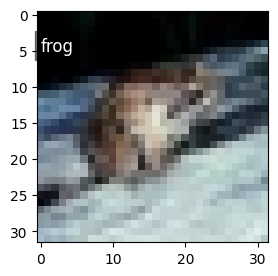

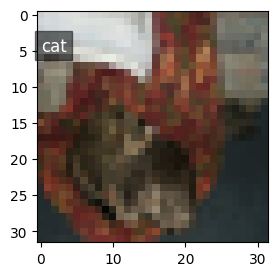

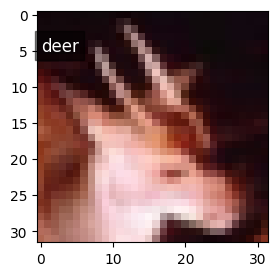

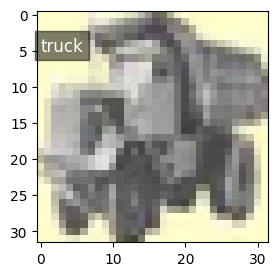

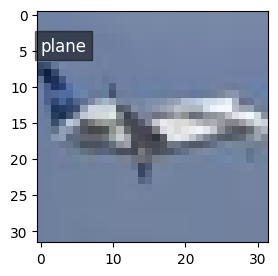

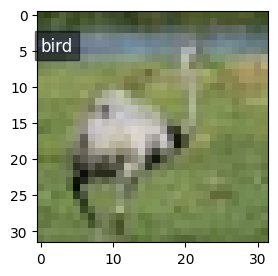

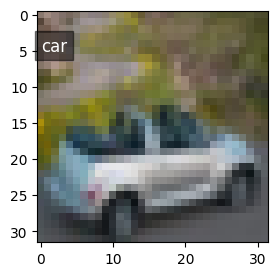

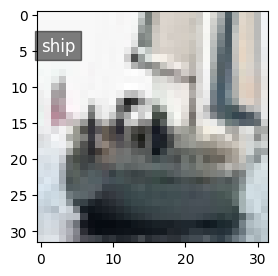

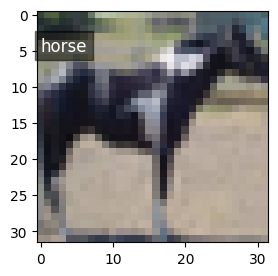

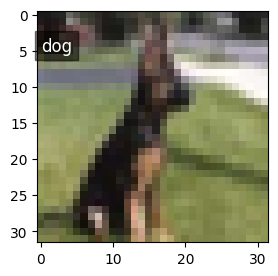

In [34]:
"""
TAREA: Muestra una imagen por cada clase del dataset CIFAR junto a su label
"""

def imshow(img, label):
    img = img / 2 + 0.5 # Desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.text(0, 5, label, fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.5))
    plt.show()

# Imagenes random de cada clase

dataiter = iter(train_loader)
images, labels = next(dataiter)

done = [False] * 10
for i in range(batch_train_size):
    if False not in done:
        break
    if done[labels[i]]:
        continue
    done[labels[i]] = True
    plt.figure(figsize=(3,3))
    imshow(images[i], classes[labels[i]])

<BarContainer object of 10 artists>

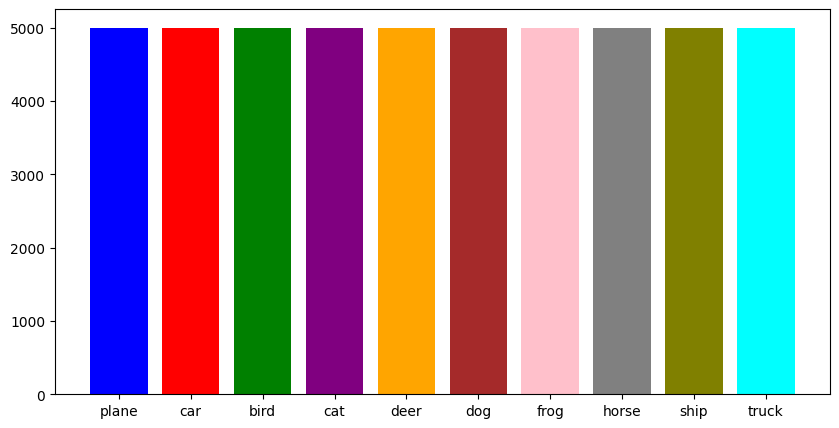

In [35]:
"""
Mostrar la distribución de clases en el dataset de entrenamiento
"""
# Contar cuantas imagenes hay de cada clase
class_count = [0] * 10
for _, labels in train_set:
    class_count[labels] += 1

# Mostrar gráfico
plt.figure(figsize=(10, 5))
plt.bar(classes, class_count, color=['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan'])

**Responder brevemente aquí:**

*   *¿Que podemos ver de las distribuciones? ¿Cuál es el impacto del balance de una base de datos en Deep Learning y CV (Computer Vision)?*

Podemos apreciar que en el set de entrenamiento es completamente uniforme en su distribución.
Esto es deseable para el aprendizaje debido a que de esta forma el modelo no tenderá a favorecer alguna clase por sobre las demás por el
simple hecho de que hay más ejemplos de esta clase. Esto pasaría ya que al tomar una imagen aleatoria
tendría más probabilidad de ser de la clase con más imágenes que de el resto.

## Actividad 2: Crear SimpleCNN

In [6]:
"""
TAREA: Ahora deben implementar una clase simple de una red convolucional en Pytorch según el diagrama del enunciado.
"""
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Defina los componentes de la CNN
        self.conv1 = nn.Conv2d(3, 6, 5) # 32x32x3 -> 28x28x6
        self.pool1 = nn.MaxPool2d(2, 2) # 28x28x6 -> 14x14x6
        self.conv2 = nn.Conv2d(6, 16, 5) # 14x14x6 -> 10x10x16
        self.pool2 = nn.MaxPool2d(2, 2) # 10x10x16 -> 5x5x16
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Conecte correctamente los componentes segun la arquitectura
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x


**Responder aquí:**

*   ¿Qué es el Max Pooling? ¿Para qué lo utilizamos en CNN?

El Max Pooling es una función que toma un _kernel_ y se desliza por la imagen tomando el valor máximo de cada región
que cubre el _kernel_. Esto se hace para reducir la dimensionalidad de la imagen y extraer características más generales
de la imagen. Además, ayuda a hacer el modelo más robusto a pequeñas variaciones en la posición de los features.

.


*   ¿Qué ventajas tiene usar ReLU en vez de una funciónde activación Sigmoide?

La función ReLU es más eficiente computacionalmente que la función sigmoide, ya que no tiene que calcular la exponencial.
Además, la función ReLU no sufre del problema de _vanishing gradient_ que tiene la función sigmoide, lo que permite
entrenar redes más profundas sin que el gradiente se haga muy pequeño.

.



## Actividad 3

In [7]:
"""
NO cambiar esta celda
"""
import torch.optim as optim

classifer_model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(classifer_model.parameters(), lr=0.001, momentum=0.9)

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
classifer_model.to(device)
summary(classifer_model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


c:\Users\Bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


In [15]:
"""
TAREA: Complete el loop de entrenamiento

TIP: recuerda debes utilizar optimizer, criterion y el modelo
"""

NUM_EPOCHS = 10
total_step = len(train_loader)

losses = []
for epoch in range(NUM_EPOCHS):
    for i, batch in enumerate(train_loader, 0):
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = classifer_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            # loss = criterion ;)
            print (f"Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i+1}/{total_step}] Loss: {loss.item():.4f}")        
    losses.append(loss.item())

print('Termina Entrenamiento!')

Epoch [1/10], Step [100/782] Loss: 1.2413
Epoch [1/10], Step [200/782] Loss: 1.2568
Epoch [1/10], Step [300/782] Loss: 1.5429
Epoch [1/10], Step [400/782] Loss: 1.3380
Epoch [1/10], Step [500/782] Loss: 1.3177
Epoch [1/10], Step [600/782] Loss: 1.1917
Epoch [1/10], Step [700/782] Loss: 1.2496
Epoch [2/10], Step [100/782] Loss: 1.3163
Epoch [2/10], Step [200/782] Loss: 1.5298
Epoch [2/10], Step [300/782] Loss: 1.3042
Epoch [2/10], Step [400/782] Loss: 1.3464
Epoch [2/10], Step [500/782] Loss: 1.2115
Epoch [2/10], Step [600/782] Loss: 1.2425
Epoch [2/10], Step [700/782] Loss: 1.4683
Epoch [3/10], Step [100/782] Loss: 1.3563
Epoch [3/10], Step [200/782] Loss: 1.1907
Epoch [3/10], Step [300/782] Loss: 1.3631
Epoch [3/10], Step [400/782] Loss: 1.3089
Epoch [3/10], Step [500/782] Loss: 1.3184
Epoch [3/10], Step [600/782] Loss: 1.1860
Epoch [3/10], Step [700/782] Loss: 1.4162
Epoch [4/10], Step [100/782] Loss: 1.3982
Epoch [4/10], Step [200/782] Loss: 1.0836
Epoch [4/10], Step [300/782] Loss:

In [17]:
# PATH = './cifar_model.pth'
# torch.save(classifer_model.state_dict(), PATH)

In [18]:
PATH = './cifar_model.pth'
classifer_model = SimpleCNN()
classifer_model.load_state_dict(torch.load(PATH))
classifer_model.to(device)

SimpleCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [19]:
print(losses)

[1.7512788772583008, 1.5864344835281372, 1.321626901626587, 0.9609004855155945, 1.248014211654663, 1.346003532409668, 1.6775906085968018, 1.0268211364746094, 0.9313771724700928, 0.9790551066398621]


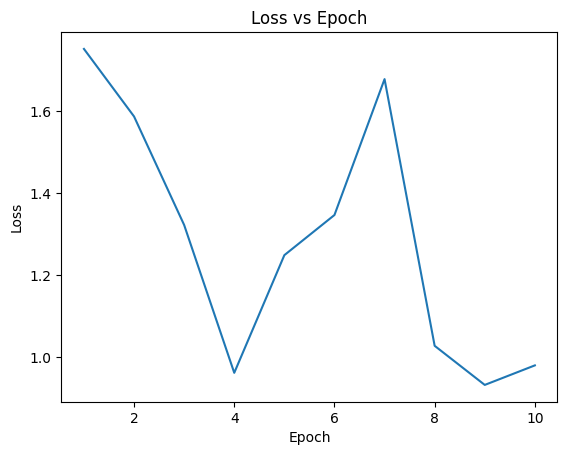

In [20]:
"""
TAREA: Grafique la perdida (loss) vs epochs
"""

plt.plot([i+1 for i in range(NUM_EPOCHS)], losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()

In [21]:
"""
TAREA: Calcule la precisión del modelo (accuracy)
"""
correct = 0
total = 0

classifer_model.eval()

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = classifer_model(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total

classifer_model.train()

print(f'Para un las {len(test_set)} imágenes de test se tiene un Accuracy: {accuracy}%')

Para un las 10000 imágenes de test se tiene un Accuracy: 51.52%


**Responder aquí:**
*   Explica brevemente porque utilizamos torch.no_grad() y model.eval() cuando evaluamos modelos en Pytorch.

Utilizamos torch.no_grad() para deshabilitar el cálculo de gradientes en el _forward pass_ de la red, ya que no necesitamos
calcular gradientes en el set de prueba y esto ahorra memoria y tiempo de cómputo. Por otro lado, utilizamos model.eval()
para poner el modelo en modo de evaluación, lo que desactiva capas como el _dropout_ y _batch normalization_ que se utilizan
durante el entrenamiento, además de cambiar el comportamiento de algunas capas como _BatchNorm_ para que se comporten de manera
determinística.

.

## Pregunta 2: ResNet (50%)

## Actividad 4

In [22]:
"""
Instancie nuevamente los Data Loaders pero ahora con un batch 100
"""

batch_size = 100

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=4)

test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=4)

**Responder brevemente aquí:**

*   ¿Qué es el *batch_size* y en que influye su tamaño? Mencione ventajas y desventajas de utilizar batchs

El _batch_size_ es la cantidad de ejemplos que se utilizan para calcular el gradiente en cada paso de entrenamiento.
Un _batch_size_ grande permite aprovechar mejor la paralelización de la GPU y acelerar el entrenamiento, además de
hacer el entrenamiento más estable al promediar el gradiente de varios ejemplos. Sin embargo, un _batch_size_ grande
requiere de más memoria y puede hacer que el modelo no generalice bien a ejemplos nuevos. Por otro lado,
un _batch_size_ pequeño requiere de menos memoria y puede ayudar al modelo a generalizar
ya que se actualiza el gradiente con ejemplos más variados en cada paso, sin embargo, también
puede hacer que el entrenamiento sea más lento y menos estable.



In [2]:
"""
Vamos a utilizar CUDA para acelerar el entrenamiento, no olvide enviar sus
tensores y modelos con .to(device). Investigue cuando usar este metodo ya que
es muy importante usarlo correctamente
"""

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Deberia mostrar "cuda" y no "cpu"

cuda


## Actividad 5


In [24]:
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3,
                     stride=stride, padding=1, bias=False)

# ResidualBlock o BasicBlock
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        
        self.conv1 = conv3x3(in_channels, out_channels, stride)

        self.bn1 = nn.BatchNorm2d(out_channels)

        self.relu = nn.ReLU(inplace=True)

        self.conv2 = conv3x3(out_channels, out_channels)

        self.bn2 = nn.BatchNorm2d(out_channels)

        self.downsample = downsample

    def forward(self, x):
        residual = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)

        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 64
        #### COMPLETAR AQUI ####
        self.conv = conv3x3(3, 64, 1) # 32x32x3 -> 32x32x64
        self.bn = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 64, layers[0]) # 32x32x64 -> 32x32x64
        self.layer2 = self.make_layer(block, 128, layers[1], 2) # 32x32x64 -> 16x16x128
        self.layer3 = self.make_layer(block, 256, layers[2], 2) # 16x16x128 -> 8x8x256
        self.layer4 = self.make_layer(block, 512, layers[3], 2) # 8x8x256 -> 4x4x512
        self.avg_pool = nn.AvgPool2d(2) # 4x4x512 -> 2x2x512
        self.fc = nn.Linear(2048, num_classes)
        ######################

    # NO MODIFICAR
    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        
        return out

In [25]:
"""
TAREA: Instancia el modelo y envialo a la GPU
Recuerda que es ResNet18
"""
from torchsummary import summary


resnet_model = ResNet(ResidualBlock, [2, 2, 2, 2])
resnet_model.to(device)
summary(resnet_model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,864
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]          36,864
       BatchNorm2d-8           [-1, 64, 32, 32]             128
              ReLU-9           [-1, 64, 32, 32]               0
    ResidualBlock-10           [-1, 64, 32, 32]               0
           Conv2d-11           [-1, 64, 32, 32]          36,864
      BatchNorm2d-12           [-1, 64, 32, 32]             128
             ReLU-13           [-1, 64, 32, 32]               0
           Conv2d-14           [-1, 64,

**Responder aquí:**

*   *¿Qué son los Residual Blocks y cuál es su impacto?*

Los Residual Blocks son bloques que se utilizan en las redes ResNet y permiten entrenar redes muy profundas.
Estos bloques permiten que el gradiente pueda fluir a través de la red sin desvanecerse, ya que el bloque
tiene una conexión directa entre la entrada y la salida del bloque.
Estos bloques solucionan el problema de degredación de la red, que es que a medida que la red se hace más profunda
el rendimiento de la red empeora, ya que se hace más difícil entrenar redes profundas debido a que
sufren problemas de entrenamiento y de optimización.


**Responder aquí:**

*   *¿Describa detalladamente que hace la función make_layers?*

La función _make_layers_ recibe como argumentos un bloque, una cantidad de canales de salida,
una cantidad de bloques por capa, y el _stride_. La función crea una capa de la red que consiste en
una secuencia de bloques del tipo que se le pasa como argumento. La cantidad de bloques que se crean
es la cantidad que se le pasa como argumento y sus características dependen de los argumentos que se
le pasan a la función (_out_channels_ y _stride_). Además la función tiene un _if_ que agrega una capa
de _downsampling_ en el caso de que el _stride_ sea mayor a 1 o que la cantidad de canales de salida sea
distinta a la cantidad de canales de entrada. El propósito de esta capa de _downsampling_ es reducir la
dimensión espacial de la imagen y aumentar la cantidad de canales de salida para que la entrada y la salida
de los bloques sean compatibles y de esta forma se pueda sumar la entrada con la salida del bloque 
residual.
 

## Actividad 6

In [26]:
"""
NO cambiar esta celda
"""

# Hyperparametros
NUM_EPOCHS = 20
LEARNING_RATE = 0.001

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet_model.parameters(), lr=LEARNING_RATE)

In [20]:
"""
Entrenamiento: utilice el modelo, el criterion y el optimizer para entrenar el modelo.
Deben utilizar GPU.
"""

total_step = len(train_loader)

for epoch in range(NUM_EPOCHS):
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = resnet_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, NUM_EPOCHS, i+1, total_step, loss.item()))

Epoch [1/20], Step [100/500] Loss: 1.8414
Epoch [1/20], Step [200/500] Loss: 1.7463
Epoch [1/20], Step [300/500] Loss: 1.1406
Epoch [1/20], Step [400/500] Loss: 1.2864
Epoch [1/20], Step [500/500] Loss: 1.2121
Epoch [2/20], Step [100/500] Loss: 0.9049
Epoch [2/20], Step [200/500] Loss: 0.8995
Epoch [2/20], Step [300/500] Loss: 0.8269
Epoch [2/20], Step [400/500] Loss: 0.9377
Epoch [2/20], Step [500/500] Loss: 0.8331
Epoch [3/20], Step [100/500] Loss: 0.6946
Epoch [3/20], Step [200/500] Loss: 0.8468
Epoch [3/20], Step [300/500] Loss: 0.5683
Epoch [3/20], Step [400/500] Loss: 0.4916
Epoch [3/20], Step [500/500] Loss: 0.4399
Epoch [4/20], Step [100/500] Loss: 0.5973
Epoch [4/20], Step [200/500] Loss: 0.4383
Epoch [4/20], Step [300/500] Loss: 0.5602
Epoch [4/20], Step [400/500] Loss: 0.5750
Epoch [4/20], Step [500/500] Loss: 0.4175
Epoch [5/20], Step [100/500] Loss: 0.2841
Epoch [5/20], Step [200/500] Loss: 0.5813
Epoch [5/20], Step [300/500] Loss: 0.3361
Epoch [5/20], Step [400/500] Loss:

In [27]:
# PATH = './cifar_resnet_model.pth'
# torch.save(resnet_model.state_dict(), PATH)

In [28]:
PATH = './cifar_resnet_model.pth'
resnet_model = ResNet(ResidualBlock, [2, 2, 2, 2])
resnet_model.load_state_dict(torch.load(PATH))
resnet_model.to(device)

ResNet(
  (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=

In [29]:
"""""
Evaluación: utilice el modelo para obtener la precisión
"""
correct = 0
total = 0

resnet_model.eval()

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = resnet_model(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total

resnet_model.train()

print(f'Para un las {len(test_set)} imágenes de test se tiene un Accuracy: {accuracy}%')

Para un las 10000 imágenes de test se tiene un Accuracy: 84.78%




Responder aquí:

*¿Qué es y que hacen en el entrenamiento de la red las variables optimizer y criterion?*

La variable _optimizer_ es la encargada de actualizar los pesos de la red en cada paso de entrenamiento
mediante un algoritmo de optimización. En este caso, se utiliza el algoritmo _Adam_ para actualizar los pesos
de la red mediante descenso de gradiente. Utiliza _learning_rates_ adaptativos para cada parámetro de la red y usa estimaciones
del primer y segundo momento del gradiente para actualizar el learning rate de cada parámetro.
Por otro lado, la variable _criterion_ es la función de pérdida que se utiliza para calcular el error de la red.
En este caso, se utiliza la función _CrossEntropyLoss_ que es una función de pérdida que se utiliza para problemas
de clasificación multiclase. Esta función calcula la pérdida entre las predicciones de la red y las etiquetas reales
de los ejemplos. Esta función es la que se utiliza para calcular el gradiente y actualizar los pesos de la red.

*¿Qué puede observar de la precisión del modelo? Analise el resultado.*

Se puede observar que la precisión es considerablemente mejor que la del modelo entrenado en la parte
1 de la tarea. Esto se debe a que la red ResNet es mucho más profunda y tiene conexiones residuales
que permiten que el gradiente fluya a través de la red, resolviendo el problema de la degradación de la red, como
se mencionó en la pregunta 5. Igualmente, este modelo de ResNet tiene 12,5 millones de parámetros,
mientras que el modelo CNN plano de la parte 1 tenía solamente 62 mil parámetros, y por ende, mucho
más capacidad de aprendizaje (dado que el problema de degradación fue resuelto).

## Object Detection (20%)

## Actividad 7

In [1]:
"""""
Traemos la libreria de YOLO ultralytics
"""

from IPython.display import clear_output, display, Image
import os
clear_output()

HOME = os.getcwd()
print(HOME)

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.13 🚀 Python-3.11.5 torch-2.3.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)
Setup complete ✅ (12 CPUs, 15.9 GB RAM, 231.4/465.1 GB disk)


In [10]:
from ultralytics import YOLO

""""
TAREA: Instancie el modelo YOLOv8 para segmentacion y obtenga la prediccion de la foto entregada
"""

image_to_predict = "bus.jpg"

yolo_model = YOLO('yolov8s-seg.pt')

results = yolo_model.predict(image_to_predict, save=True, exist_ok=True)


image 1/1 c:\Users\Bruno\Desktop\ing\progra\DL\T1\bus.jpg: 640x480 4 persons, 1 bus, 1 tie, 1 skateboard, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\segment\predict


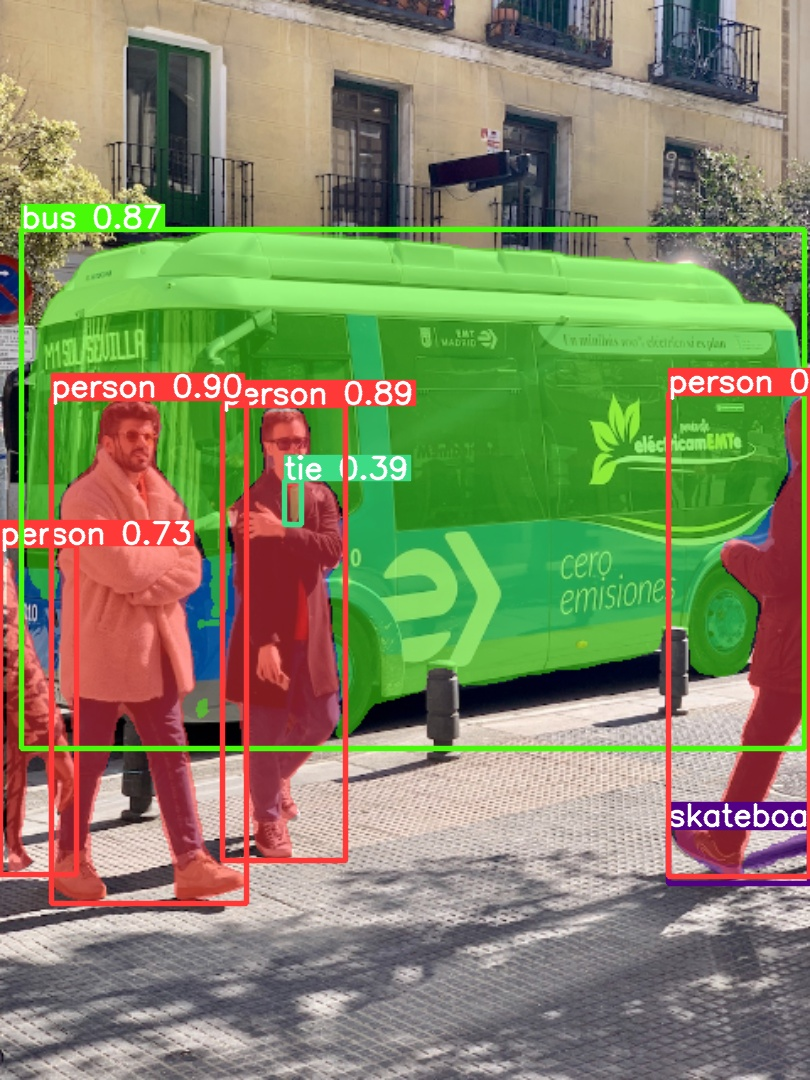

In [11]:
""""
TAREA: Muestra la foto segmentada por Yolov8 (puedes usar Image())
"""

import os

display(Image(os.path.join("runs", "segment", "predict", "bus.jpg")))

**Responder aquí:**

*   *¿Por qué utilizamos modelos pre-entrenados (pretrained)? ¿Cuáles son las ventajas y desventajas?*

Se utilizan modelos pre-entrenados para aprovechar el conocimiento que ya tienen los modelos sobre
un conjunto de datos grande y general. Esto permite que el modelo pueda generalizar mejor a nuevos
conjuntos de datos y acelerar el proceso de entrenamiento. Además, los modelos pre-entrenados
suelen tener una arquitectura más compleja y profunda que los modelos que se pueden entrenar desde cero,
lo que permite que el modelo pueda aprender _features_ más generales y complejas. Por otro lado, una desventaja
de utilizar modelos pre-entrenados es que pueden tener un _bias_ hacia los datos con los que fueron entrenados
y no generalizar bien a nuevos conjuntos de datos.

## Actividad 8

In [4]:
""""
TAREA: Ahora intenta utilizar un modelo pre-entrenado para segmentacion de las 3
imagenes de grietas
"""
import random

im1 = random.choice(os.listdir(os.path.join("data", "cracks-dataset", "valid", "images")))
im2 = random.choice(os.listdir(os.path.join("data", "cracks-dataset", "valid", "images")))
im3 = random.choice(os.listdir(os.path.join("data", "cracks-dataset", "valid", "images")))


image 1/1 c:\Users\Bruno\Desktop\ing\progra\DL\T1\data\cracks-dataset\valid\images\3076.rf.d118523f1ee4758f16cccda36708c02b.jpg: 640x640 (no detections), 173.0ms
Speed: 4.0ms preprocess, 173.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict


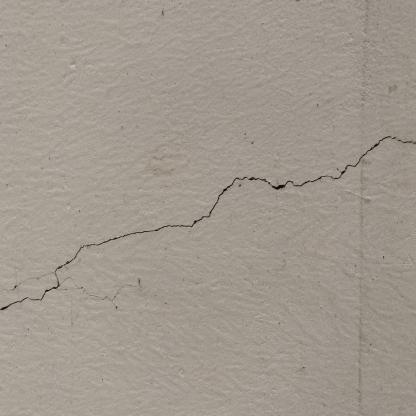


image 1/1 c:\Users\Bruno\Desktop\ing\progra\DL\T1\data\cracks-dataset\valid\images\2079.rf.371fd1cc8384c68696af4b364662f029.jpg: 640x640 (no detections), 62.0ms
Speed: 5.0ms preprocess, 62.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict


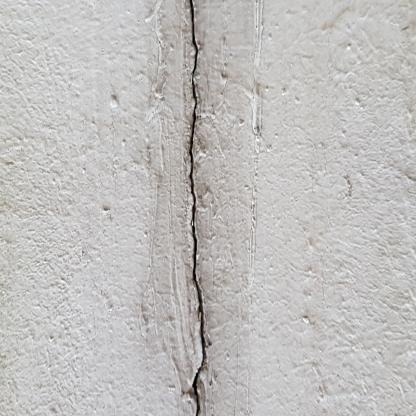


image 1/1 c:\Users\Bruno\Desktop\ing\progra\DL\T1\data\cracks-dataset\valid\images\3241.rf.973fdcccb319fea610fd27fc61ad44bc.jpg: 640x640 (no detections), 9.0ms
Speed: 3.0ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict


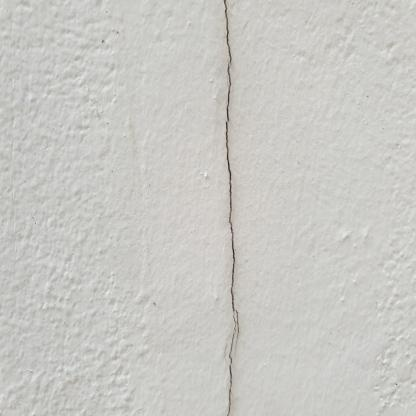

In [5]:
""""
TAREA: Muestra la foto segmentada por Yolov8
"""

images = [im1, im2, im3]

def predict_images(images, model):
  for image in images:
    image_path = os.path.join("data", "cracks-dataset", "valid", "images", image)
    results = model.predict(image_path, save=True, exist_ok=True)
    display(Image(os.path.join("runs", "segment", "predict", image)))

predict_images(images, yolo_model)

**Responder aquí:**

*   *¿Pudo reconocer el modelo las grietas? ¿Por qué pudo reconocer personas/buses y no las
grietas?*

El modelo pudo reconocer personas y buses porque estas clases son más comunes en el conjunto de datos
con el que fue pre-entrenado el modelo. Por otro lado, las grietas no son una clase común
(o inexistente) en el conjunto de datos con el que fue pre-entrenado el modelo, por lo que el modelo
no pudo reconocerlas. Esto se debe a que los modelos pre-entrenados aprenden _features_ generales
de los datos con los que fueron entrenados y si las grietas no son una clase común en esos datos
el modelo no podrá reconocerlas.

## Actividad 9

In [6]:
""""
TAREA: Ahora debes traer la data de las grietas
"""

# Nuestra carpeta con las imagenes de grietas
yaml_path = os.path.join("data", "cracks-dataset", "data.yaml")

In [17]:
""""
TAREA: Ahora debes entrenar (fine-tune) el modelo YOLOv8 para segmentacion de una grietas
TIP esto puede tomar un tiempo y se debe usar GPU.
"""
yolo_model.train(data=yaml_path, imgsz=416, epochs=20)
yolo_model.save('cracks_model.pt')

New https://pypi.org/project/ultralytics/8.2.5 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.13 🚀 Python-3.11.5 torch-2.3.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)
engine\trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=data\cracks-dataset\data.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

100%|██████████| 6.23M/6.23M [00:08<00:00, 770kB/s] 
c:\Users\Bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning C:\Users\Bruno\Desktop\ing\progra\DL\T1\data\cracks-dataset\train\labels.cache... 3717 images, 10 backgrounds, 0 corrupt: 100%|██████████| 3727/3727 [00:00<?, ?it/s]
val: Scanning C:\Users\Bruno\Desktop\ing\progra\DL\T1\data\cracks-dataset\valid\labels.cache... 200 images, 1 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]


Plotting labels to runs\segment\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs\segment\train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/233 [00:00<?, ?it/s]c:\Users\Bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       1/20      2.36G      1.836      2.204      1.782      1.624         31        416: 100%|██████████| 233/233 [00:41<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]

                   all        200        249      0.558       0.61      0.553      0.304      0.472      0.518      0.402      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.44G      1.231      1.582      1.106        1.2         35        416: 100%|██████████| 233/233 [00:36<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]

                   all        200        249      0.579      0.608      0.568      0.319       0.57      0.514      0.458      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.42G      1.187      1.561      1.059      1.163         43        416: 100%|██████████| 233/233 [00:35<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.58it/s]

                   all        200        249      0.667      0.643      0.645      0.364      0.613       0.59      0.581      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.43G      1.129      1.555      1.004      1.134         32        416: 100%|██████████| 233/233 [00:35<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.59it/s]

                   all        200        249      0.775      0.687      0.726      0.468      0.697      0.627      0.591      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.43G      1.092      1.508     0.9702      1.118         39        416: 100%|██████████| 233/233 [00:35<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.69it/s]

                   all        200        249      0.737      0.685      0.738      0.498      0.682      0.577       0.58      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.44G      1.056      1.488     0.9338      1.101         35        416: 100%|██████████| 233/233 [00:35<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.66it/s]

                   all        200        249      0.748      0.707      0.712      0.494      0.658      0.622      0.563      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.42G      1.024      1.478     0.9085      1.096         34        416: 100%|██████████| 233/233 [00:35<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.72it/s]

                   all        200        249       0.74      0.707      0.708      0.461      0.671      0.627      0.576      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.43G     0.9933      1.439     0.8585      1.078         42        416: 100%|██████████| 233/233 [00:35<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.60it/s]

                   all        200        249      0.817      0.675      0.756      0.532      0.726      0.597      0.618      0.213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.44G     0.9691      1.444     0.8507      1.067         42        416: 100%|██████████| 233/233 [00:34<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.66it/s]

                   all        200        249      0.754      0.715      0.756      0.528      0.702      0.667      0.651      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.43G     0.9414      1.413     0.8179      1.053         44        416: 100%|██████████| 233/233 [00:34<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.59it/s]

                   all        200        249      0.714       0.65      0.694      0.476      0.666      0.554      0.565      0.192


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.43G     0.9043      1.111     0.8935       1.11         18        416: 100%|██████████| 233/233 [00:36<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.53it/s]

                   all        200        249      0.726      0.707      0.742      0.544      0.723      0.639      0.663      0.232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.43G     0.8817      1.095     0.8677      1.098         25        416: 100%|██████████| 233/233 [00:35<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.25it/s]

                   all        200        249      0.822       0.74      0.788      0.556      0.843      0.624      0.672      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.42G     0.8387      1.091     0.8277      1.084         19        416: 100%|██████████| 233/233 [00:35<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.57it/s]

                   all        200        249      0.804      0.693      0.785      0.591      0.756      0.647       0.68      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.44G     0.7932      1.086     0.7962      1.061         19        416: 100%|██████████| 233/233 [00:35<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.16it/s]

                   all        200        249      0.843      0.692      0.781      0.579      0.798      0.643       0.68      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.43G     0.7821      1.069     0.7667      1.061         22        416: 100%|██████████| 233/233 [00:35<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.38it/s]

                   all        200        249      0.817      0.707      0.794      0.618      0.789      0.643      0.686      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.42G     0.7388      1.065     0.7313       1.04         18        416: 100%|██████████| 233/233 [00:35<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.57it/s]

                   all        200        249      0.851      0.703      0.794      0.613      0.818      0.659      0.708       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.43G     0.7387      1.042     0.7078      1.039         21        416: 100%|██████████| 233/233 [00:35<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.51it/s]

                   all        200        249      0.825      0.736      0.785      0.604      0.784      0.659      0.688      0.221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.44G     0.6999       1.02      0.674      1.028         19        416: 100%|██████████| 233/233 [00:35<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.61it/s]

                   all        200        249      0.846      0.749      0.807      0.629      0.804      0.703      0.728      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.43G     0.6814      1.015     0.6508       1.01         16        416: 100%|██████████| 233/233 [00:35<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.64it/s]

                   all        200        249      0.841      0.715      0.783      0.618      0.812      0.667      0.711      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.42G     0.6725      1.008     0.6331      1.013         16        416: 100%|██████████| 233/233 [00:35<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.65it/s]

                   all        200        249      0.815      0.743       0.81      0.642      0.772      0.719      0.732      0.256



20 epochs completed in 0.225 hours.
Optimizer stripped from runs\segment\train\weights\last.pt, 23.8MB
Optimizer stripped from runs\segment\train\weights\best.pt, 23.8MB

Validating runs\segment\train\weights\best.pt...
Ultralytics YOLOv8.1.13 🚀 Python-3.11.5 torch-2.3.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]


                   all        200        249      0.818      0.743       0.81      0.642      0.772      0.719      0.732      0.255
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs\segment\train


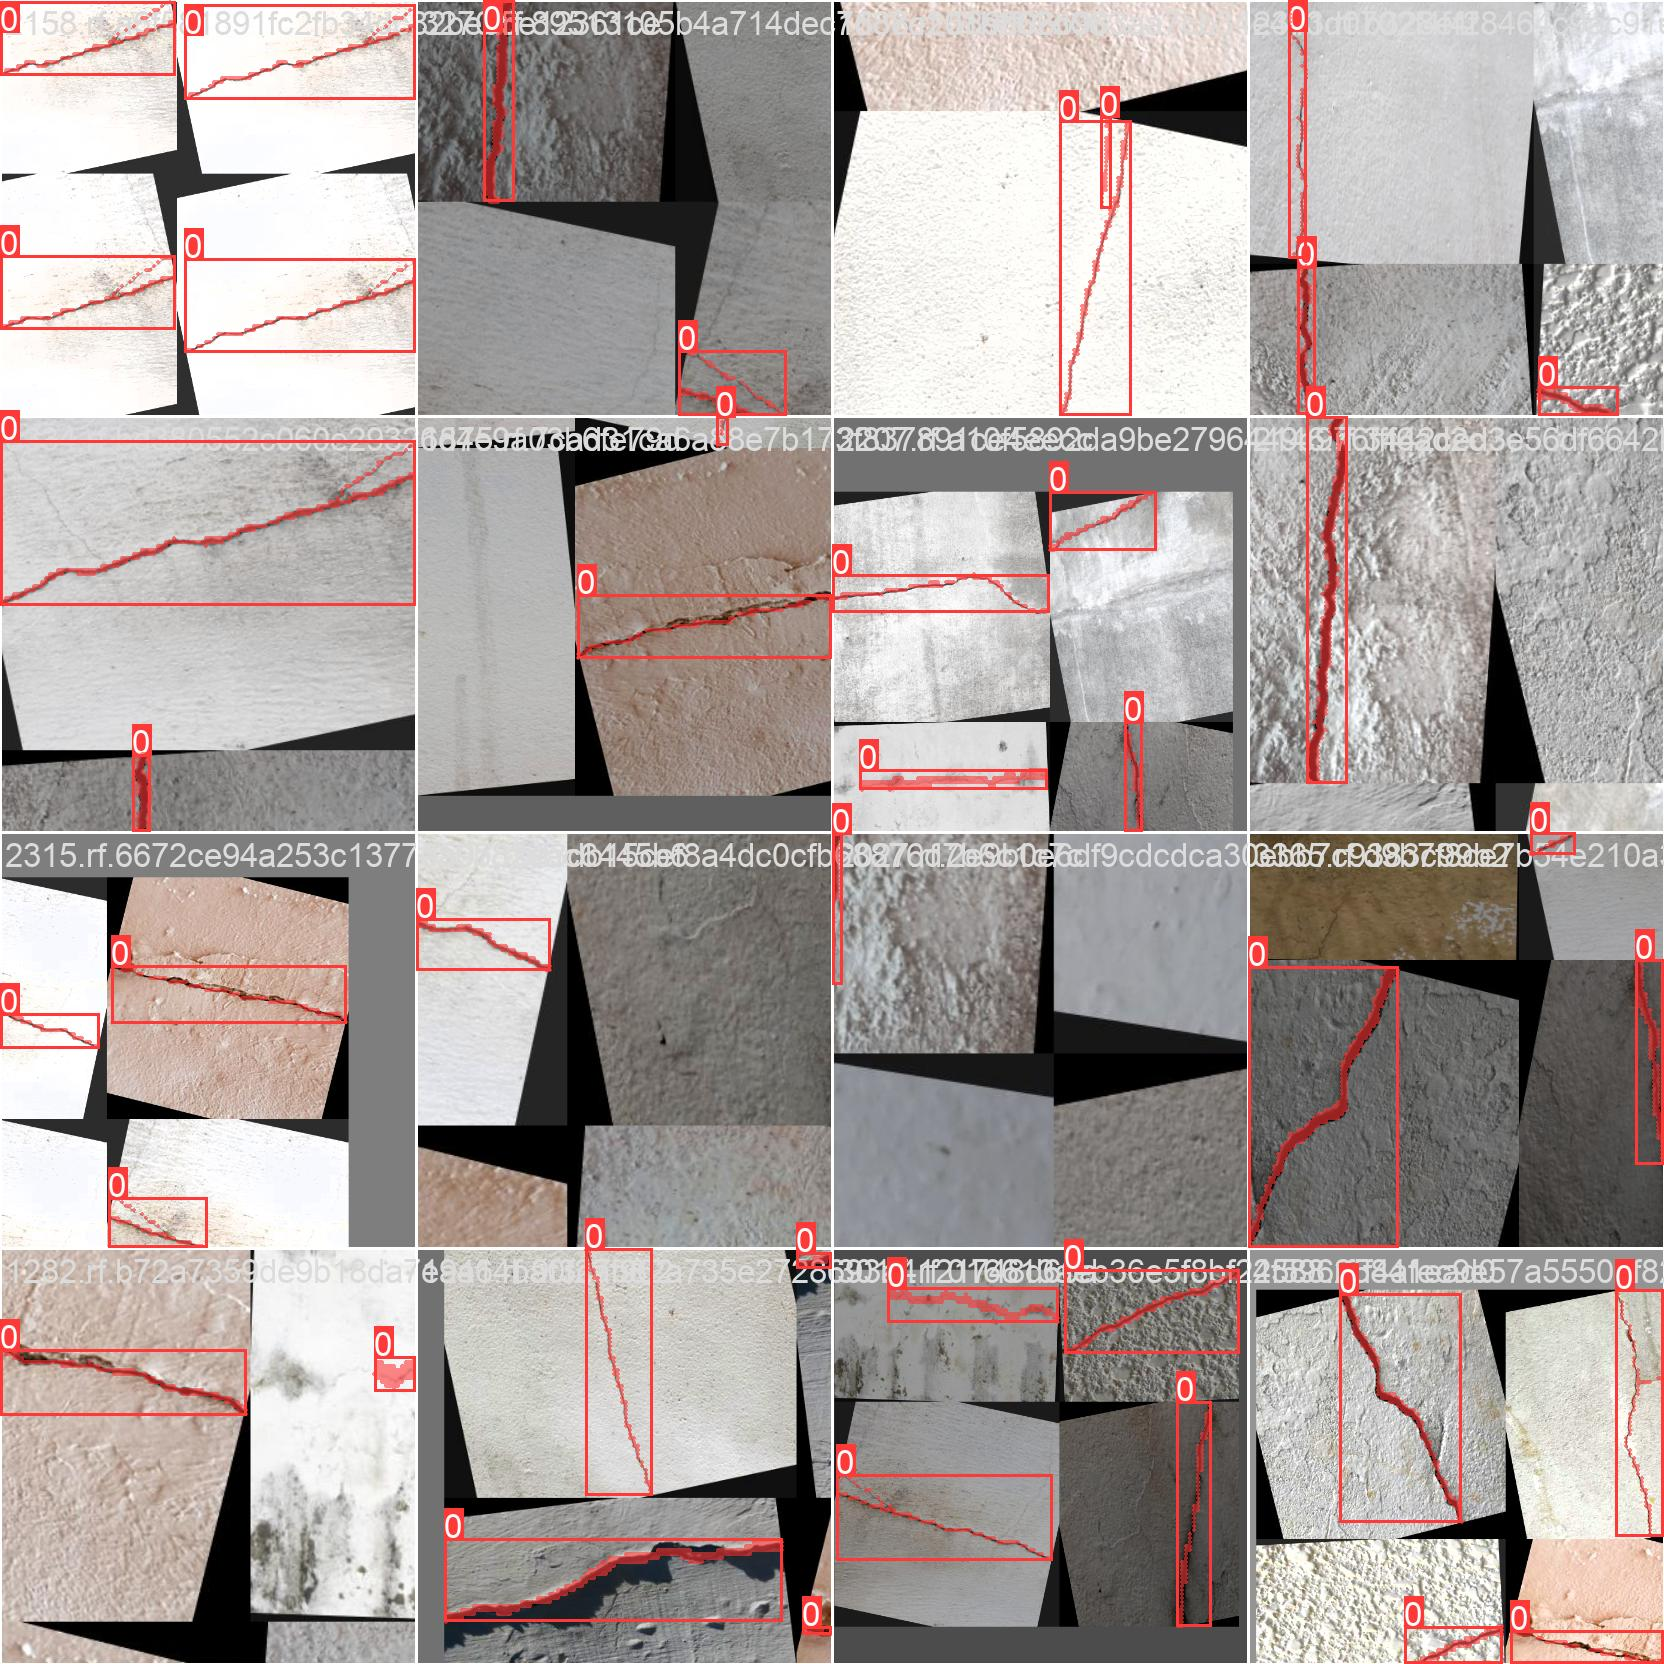

In [20]:
""""
TAREA: Muestra una foto de batch del entrenamiento
"""
display(Image(os.path.join("runs", "segment", "train", "train_batch0.jpg")))


image 1/1 c:\Users\Bruno\Desktop\ing\progra\DL\T1\data\cracks-dataset\valid\images\3076.rf.d118523f1ee4758f16cccda36708c02b.jpg: 416x416 1 crack, 43.0ms
Speed: 2.0ms preprocess, 43.0ms inference, 5.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\segment\predict


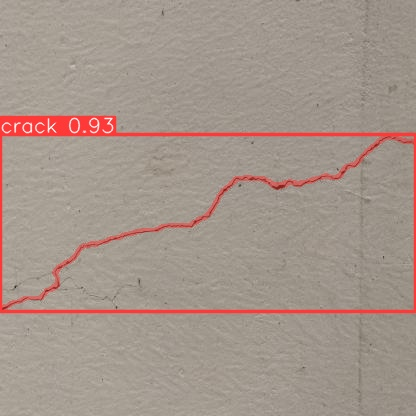


image 1/1 c:\Users\Bruno\Desktop\ing\progra\DL\T1\data\cracks-dataset\valid\images\2079.rf.371fd1cc8384c68696af4b364662f029.jpg: 416x416 1 crack, 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 4.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\segment\predict


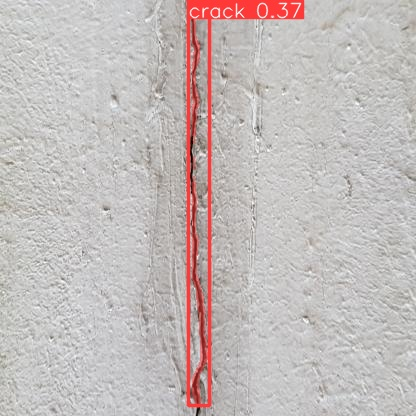


image 1/1 c:\Users\Bruno\Desktop\ing\progra\DL\T1\data\cracks-dataset\valid\images\3241.rf.973fdcccb319fea610fd27fc61ad44bc.jpg: 416x416 1 crack, 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\segment\predict


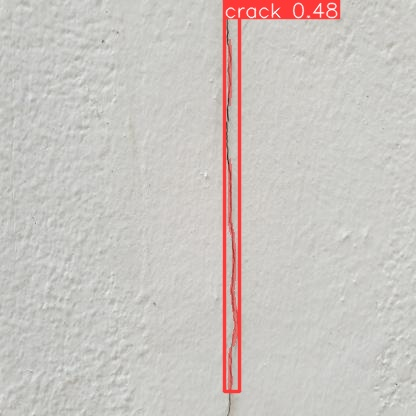

In [26]:
""""
TAREA: Ahora realiza una prediccion a la foto de la grieta inicial con el modelo entrenado
"""

best_path = os.path.join("runs", "segment", "train", "weights", "best.pt")
yolo_model_entrenado = YOLO(best_path)

predict_images(images, yolo_model_entrenado) # Predecir con el modelo entrenado y mostrar las imagenes

**Responder aquí:**

*   ¿Por qué ahora el modelo detecta las imágenes? Investigue y explique que es Fine Tunning.

El modelo ahora detecta las imágenes porque se realizó _fine tuning_ del modelo pre-entrenado.
El _fine tuning_ es una técnica que consiste en entrenar un modelo pre-entrenado con un conjunto de datos
nuevo y específico para un problema en particular. Esto se hace para que el modelo pueda adaptarse
a las características específicas del nuevo conjunto de datos y pueda generalizar mejor a este conjunto de datos.

La ventaja de utilizar _fine tuning_ es que se puede aprovechar el conocimiento que ya tiene el modelo
sobre un conjunto de datos general y adaptarlo a un conjunto de datos específico, lo que permite
que el modelo pueda generalizar mejor a este conjunto de datos y acelerar el proceso de entrenamiento.

Por último:

**Responder aquí:**

*   Explique el aporte del modelo Yolo a CV y sus principales innovaciones

El modelo YOLO (You Only Look Once) es un modelo de detección de objetos en imágenes en tiempo real,
esto lo logra debido a que como su nombre indica, logra detectar y segmentar objetos dentro de una
imagen en una sola pasada, a diferencia de otros modelos que requieren de múltiples pasadas por la imagen.
Debido a esto, al momento de su lanzamiento, YOLO fue un gran avance en la detección de objetos en tiempo real,
diferenciándose de otros modelos que eran más lentos y menos eficientes.
YOLO divida la imagen en grillas y predice las coordenadas de los _bounding boxes_ y las probabilidades de las clases
dentro de cada celda de la grilla. Esto permite que YOLO sea más rápido y eficiente y simplifica
la tarea de encontrar múltiples objetos en una imagen.
Finalmente, el gran aporte de YOLO se resume en que es un modelo que tiene un gran balance entre 
velocidad y precisión, lo que lo hace ideal para aplicaciones en tiempo real y en aplicaciones donde
se necesita detectar múltiples objetos en una imagen. 


*   De y explique 3 ejemplos de donde aplicar este tecnolgias y sus ventajas.

1. Uno de los ejemplos más prometedores en los que podría utilizarse esta tecnología es en la conducción autónoma.
En este caso, YOLO podría ser utilizado para detectar y segmentar objetos en la carretera, como otros vehículos,
peatones, señales de tránsito, entre otros. La ventaja de utilizar YOLO en este caso es que es un modelo
rápido y eficiente, lo que permite que el vehículo pueda detectar y reaccionar a los objetos en tiempo real
y de forma razonablemente confiable.
2. Otro ejemplo en el que podría utilizarse YOLO es en la vigilancia y seguridad. En este caso, YOLO podría
ser utilizado para detectar y segmentar objetos en una imagen o video, como personas, vehículos, o cualquier
otro objeto de interés. La ventaja de utilizar YOLO en este caso es que es un modelo rápido y eficiente,
lo que permite que se pueda detectar y reaccionar a los objetos en tiempo real y de forma precisa.
En la práctica, esto ya está ocurriendo, por ejemplo con los detectores de patentes de los estacionamientos de malls.
3. Por último, otro ejemplo en el que podría utilizarse YOLO es en la medicina. En este caso, YOLO podría ser
utilizado para detectar y segmentar objetos en imágenes médicas, como tumores, órganos, o cualquier otro objeto
de interés. La ventaja de utilizar YOLO en este caso es que es un modelo rápido y eficiente, lo que permite
que se pueda detectar y segmentar objetos en tiempo real y de forma precisa, lo que podría ayudar a los médicos
a diagnosticar enfermedades de forma más rápida y precisa. Sin embargo, es importante tener en cuenta que
en este caso, la precisión y confiabilidad del modelo es crítica, por lo que se debería tener un cuidado especial
en la implementación y validación del modelo.


*   ¿Qué consideraciones se deben tener al aplicar CV en la vida real? Nombre algunos riesgos de utilizar CV

La principal consideración que hay que tener siempre, es que es probable que el modelo se equivoque
tarde o temprano, y ante esta situación, es importante tener un plan de contingencia para manejar
estos errores, de forma que no termine en una situación grave. Por otro lado, hay que siempre tener
en cuenta que el funcionamiento de estos modelos depende de la forma en la que fueron entrenados, y
por ello pueden tener sesgos y errores heredados desde el conjunto de datos.

Algunos riesgos de utilizar CV son:
1. Discriminación: Los modelos de CV pueden tener sesgos y discriminaciones inherentes a los datos con los que fueron entrenados.
2. Privacidad: Los modelos de CV pueden ser utilizados para recolectar información privada de las personas sin su consentimiento.
3. Errores: Los modelos de CV pueden cometer errores y tomar decisiones incorrectas que pueden tener consecuencias graves.
4. Responsabilidad: Los modelos de CV pueden ser utilizados para tomar decisiones importantes que afectan a las personas, por lo que es importante tener en cuenta la responsabilidad y ética de utilizar estos modelos.

In [ ]:
"""
FIN :)
"""